In [5]:
#calculando o gap da capacidade industrial instalada utilizando método HP
#carregando biblioteca pandas, matplotlib e statsmodels
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

In [6]:
# 1) carregando minha série
df = pd.read_excel('/content/cap_instalada.xlsx')
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

In [7]:
#visualizar dados
print(df.head())

            cap_instalada
Data                     
2010-01-01           82.3
2010-02-01           82.1
2010-03-01           83.3
2010-04-01           83.8
2010-05-01           83.7


In [8]:
# 2) selecionado a coluna
u = df['cap_instalada']

In [9]:
# 3) Aplicando filtro HP
# para frequencia mensal usamos lambda = 129600
u_cycle, u_trend = hpfilter(u, lamb=129600)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


In [10]:
# 4) Adicionar ao data frame
df['u'] = u
df['u_trend'] = u_trend
df['gap_pp'] = df['u'] - df['u_trend'] # gap em pontos percentuais

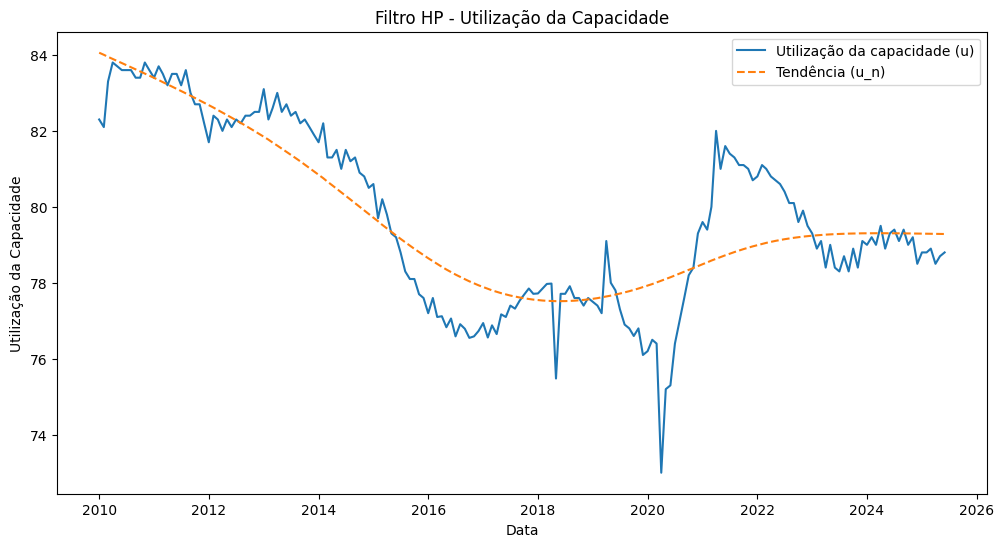

In [11]:
# 5) plotar resultados
plt.figure(figsize=(12,6))
plt.plot(df.index,df['u'],label = 'Utilização da capacidade (u)')
plt.plot(df.index,df['u_trend'], label = 'Tendência (u_n)', linestyle = '--')
plt.title('Filtro HP - Utilização da Capacidade')
plt.xlabel('Data')
plt.ylabel('Utilização da Capacidade')
plt.legend()
plt.show()

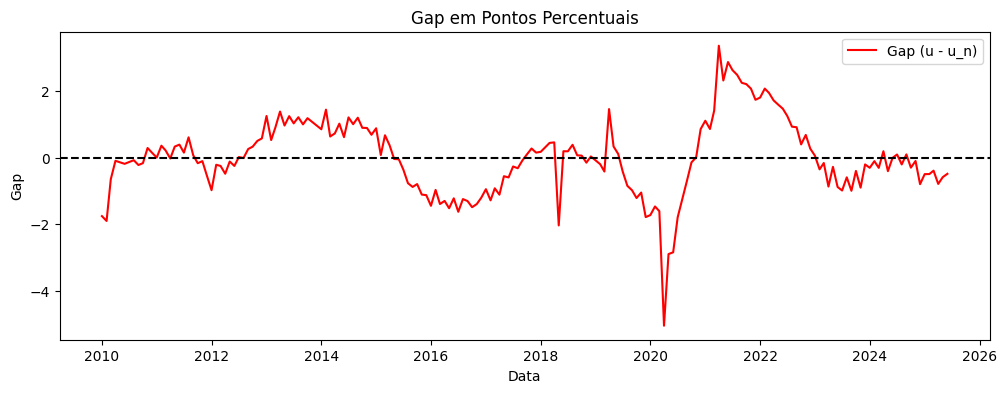

In [12]:
# 6) Gap em pontos percentuais
plt.figure(figsize=(12,4))
plt.plot(df.index, df['gap_pp'], label = 'Gap (u - u_n)', color = 'red')
plt.axhline(0, color = 'black', linestyle = '--')
plt.title('Gap em Pontos Percentuais')
plt.xlabel('Data')
plt.ylabel('Gap')
plt.legend()
plt.show()

In [14]:
# 7) salvar a série
df.to_excel("nuci_gap_hp.xlsx")